In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generación de datos

In [8]:
from src.data_gen import generate_instances

instances = generate_instances(filename="TSP50.pkl", instance_count=100, cities=50, seed=42)
instanciaDificil = generate_instances(filename="TSP_dificil.pkl", instance_count=10, cities=500, seed=42)

In [9]:
from src.data_gen import generate_train_data

generate_train_data(instance_file="TSP50.pkl", data_filename="TSP50_train_data.pkl")

# Entrenamiento

In [10]:
from src.training import load_data

dataset = load_data(file_path="TSP50_data.pkl")

In [11]:
from src.models import TSPTransformer

# Parámetros del modelo
input_dim = 2
embed_dim = 128
num_heads = 8
head_dim = 32
num_layers = 3
dropout = 0.1

# Crear modelo
model = TSPTransformer(
    input_dim=input_dim,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_layers=num_layers,
    dropout_rate=dropout
)

model.init_weights()  # Inicializar pesos del modelo

c:\Users\PC RST GALAX\Desktop\Practica\TransformerTSP\venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


In [ ]:
from src.training import train

epochs = 250
train_size = 1000
test_size = 200
batch_size = 32
learning_rate = 1e-4
seed = 42

stats = train(model, dataset, epochs, train_size, test_size, batch_size, learning_rate, seed)

Usando dispositivo: cuda


In [ ]:
from src.training import save_model
save_model(model, filename="model_bueno.pth")

In [14]:
from src.training import load_model
model = load_model(model, filename="model_3.pth")

# Validación

In [15]:
from src.solvers.model import ModelSolver

model_solver = ModelSolver(model)
model_sol = model_solver.solve(instance_file="TSP50.pkl", instance_number=0)
model_dificil_sol = model_solver.solve(instance_file="TSP_dificil.pkl", instance_number=0)

print("Predicted cost:", model_sol.cost)
model_sol.plot()

print("Predicted cost (difficult instance):", model_dificil_sol.cost)
model_dificil_sol.plot()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Optimal cost: 5.393124245897437


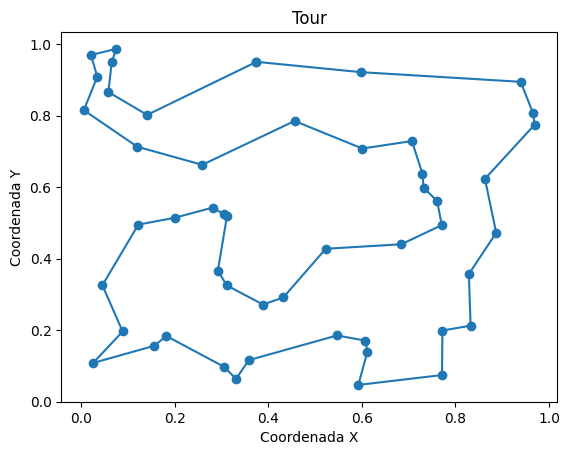

Optimal cost (difficult instance): 7.7235437730483625


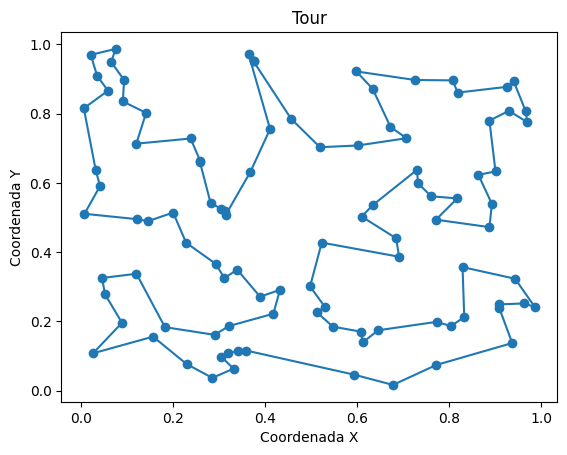

In [ ]:
from src.data_gen import read_instances
from src.solvers.ortools import solve

instances = read_instances("TSP50.pkl")
instance = instances[0]
ortools_sol = solve(instance)
print("Optimal cost:", ortools_sol.cost)
ortools_sol.plot()

instanciaDif = read_instances("TSP_dificil.pkl")
instanceDificil = instanciaDif[0]
ortools_sol_dificil = solve(instanceDificil)
print("Optimal cost (difficult instance):", ortools_sol_dificil.cost)
ortools_sol_dificil.plot()

In [ ]:
from src.solvers.ortools import solve
from src.solvers.model import ModelSolver

instances = read_instances("TSP50.pkl")
model_costs = []
opt_costs = []

model_solver = ModelSolver(model)

for i, instance in enumerate(instances):
    model_sol = model_solver.solve(instance_file="TSP50.pkl", instance_number=i)
    ortools_sol = solve(instance)

    model_costs.append(model_sol.cost)
    opt_costs.append(ortools_sol.cost)

print("Avg gap (%):", sum((mc - oc) / oc * 100 for mc, oc in zip(model_costs, opt_costs)) / len(opt_costs))

Avg gap (%): 7.177289038275786


### comprobar gap promedio con la data de validacion